#### Search Based Problem Solving
我们根据中国的城市，租一个简易版的导航地图


#### 计算两个地点间的距离
1. 构建城市与经纬度的词典
2. 引入networkx包，传入城市绘制地图
3. 求出任意两个城市的距离
4. 求出开始地点和目标地点途径的城市  

In [2]:
import matplotlib
print(matplotlib.__path__)

['/anaconda3/lib/python3.6/site-packages/matplotlib']


In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [4]:
import networkx as nx

In [5]:
import math

In [6]:
import re

In [7]:
pattern = r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]"

In [8]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [9]:
# pattern = re.compile()

In [3]:
city_location = {
    '香港' : (114.17, 22.26)
}
type(city_location['香港'])

tuple

#### Input: String -> dict

In [11]:
test_string = "{name:'兰州', geoCoord:[113.54, 22.18]}"

In [12]:
re.findall(pattern, test_string)[0]

('兰州', '113.54', '22.18')

In [13]:
simple_connection_info_src = {}

In [14]:
city_location = {}

In [15]:
# 获取每座城市对应的经纬度 北京(116.46, 39.92)

In [16]:
for line in coo

SyntaxError: invalid syntax (<ipython-input-16-6315e2975487>, line 1)

In [17]:
for line in coordination_source.split('\n'):
    if line.startswith('//'):continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]

    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [18]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [50]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [51]:
get_geo_distance('杭州', '上海')

153.5185697155768

In [21]:
import networkx as nx

In [22]:
print(city_location.keys())

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])


In [23]:
cities = list(city_location.keys())

In [24]:
city_graph = nx.Graph()

In [25]:
city_graph.add_nodes_from(cities)

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


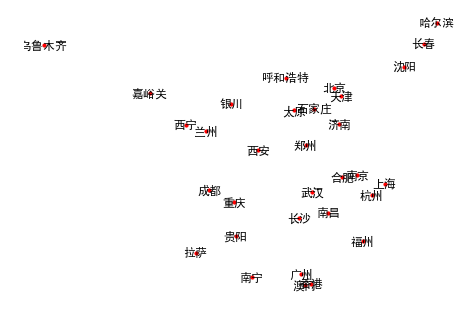

In [29]:
nx.draw(city_graph, city_location,with_labels=True, node_size=10)

In [2]:
threshold = 700

In [3]:
from collections import defaultdict

In [4]:
cities_connection = defaultdict(list)

In [33]:
simple_connection_info = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


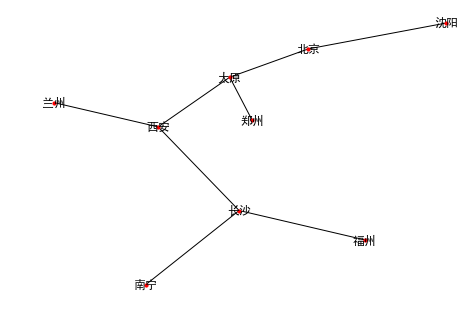

In [34]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

## Breadth First Search 

In [35]:
# def search(start, destination, connection_grpah):
#     pathes = [[start]]
    
#     visitied = set()
    
#     while pathes: # if we find existing pathes
#         path = pathes.pop(0)
#         froninter = path[-1]
        
#         if froninter in visitied: continue
            
#         successors = connection_grpah[froninter]
        
#         for city in successors:
#             if city in path: continue  # eliminate loop
                
#             new_path = path + [city]
            
#             pathes.append(new_path)
            
#             if city == destination: return new_path
        
#         visitied.add(froninter)
        
# #         pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [71]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]] # [北京]
    visitied = set()  # 代表访问过的城市
    
    while pathes: # if we fisnd existing pathes
        path = pathes.pop(0) # 取出pathes中第一个城市
        froninter = path[-1] # 取出当前城市对应路径树中最边缘的
        
        if froninter in visitied: continue
        
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path:continue # eliminate loop
            
            new_path =  path + [city]
              
            pathes.append(new_path)
            
            if city == destination: return new_path
        visitied.add(froninter) 
        
#         pathes = sorted(pathes, key=sort_candidate)
        pathes = sort_candidate(pathes)

In [37]:
simple_connection_info
# 就是说数据需要处理成这种格式 

{'北京': ['太原', '沈阳'],
 '太原': ['北京', '西安', '郑州'],
 '兰州': ['西安'],
 '郑州': ['太原'],
 '西安': ['兰州', '长沙'],
 '长沙': ['福州', '南宁'],
 '沈阳': ['北京']}

In [68]:
search('北京', '福州', simple_connection_info, sort_candidate=lambda n: n)

['北京', '太原', '西安', '长沙', '福州']

In [72]:
# 最短站数优先
def transfer_stations_first(path):
    return len(path)

In [84]:
# 最短距离优先
def shortest_path_first(pathes):
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])

    return sorted(pathes, key=get_path_distance)

In [87]:
                                                                                                                                                                                                                                                              search('北京', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['北京', '太原', '西安', '长沙', '福州']

In [83]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [79]:
pretty_print(search('北京', '福州', simple_connection_info))

TypeError: search() missing 1 required positional argument: 'sort_candidate'

## Deepth First Search 

深度优先遍历

In [40]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
#             visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            visited = visited + [successor]
        
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [78]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [42]:
number_graph = defaultdict(list)

number_graph.update({
    1: [2, 3],
    2: [1, 4],
    3: [1, 5],
    4: [2, 6],
    5: [3, 7],
    7: [5, 8]
})

In [43]:
from collections import defaultdict

In [44]:
simple_connection_info = defaultdict(list)

In [45]:
simple_connection_info.update(simple_connection_info_src)

In [46]:
bfs(number_graph, 1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

In [47]:
a = [1, 2, 3, 4, 5]

In [53]:
threshold = 300

In [81]:
cities_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '贵阳'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',
            

In [57]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
            
        distance  = get_geo_distance(c1, c2)
        
        if distance < threshold:
            cities_connection[c1].append(c2)
            cities_connection[c2].append(c1)

In [58]:
cities_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '贵阳'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',
            

In [59]:
city_with_road = nx.Graph(cities_connection)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


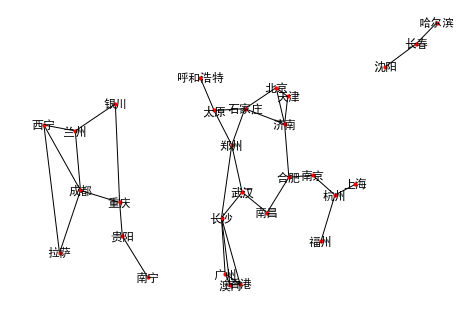

In [60]:
nx.draw(city_with_road, city_location,with_labels=True, node_size=10)

In [66]:
search('北京', '南京', cities_connection)

['北京', '济南', '合肥', '南京']

In [182]:
print(list)

<class 'list'>


In [184]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [185]:
cities_connection_graph = nx.Graph(cities_connection)

/Users/wuzhibo/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


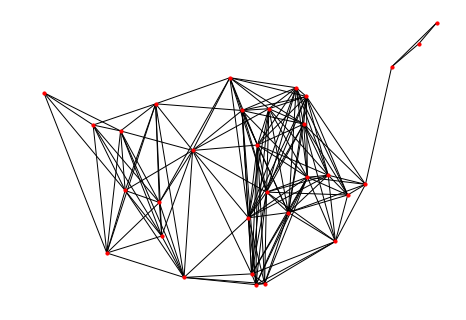

In [186]:
nx.draw(cities_connection_graph, city_location, with_lables=True, node_size=10)

## Machine Learning

1. 引入boston数据包
2. 掌握方式
3. 了解loss函数
4. 优化方式


In [114]:
from sklearn.datasets import load_boston

In [115]:
# 引入波士顿房价数据
data = load_boston()

In [116]:
type(data)

sklearn.utils.Bunch

In [117]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [118]:
X, Y = data['data'], data['target']

In [119]:
data['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [120]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [121]:
Y[1]

21.6

In [122]:
X[:, 0]

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [123]:
x = [1, 2, 3, 4, 5, 6, 7]

In [124]:
 type(X[:, 0])

numpy.ndarray

In [125]:
# 将X['CRME']与Y轴对应值画出来
%matplotlib inline

In [126]:
import matplotlib.pyplot as plt 

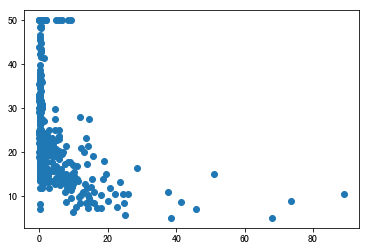

In [127]:
plt.scatter(X[:, 0], Y)

In [128]:
def draw_rm_and_price():
    plt.scatter(X[:, 5] , Y)

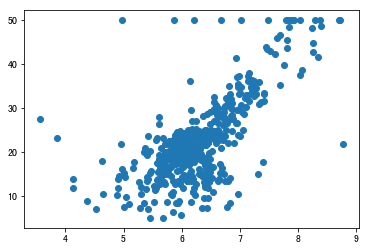

In [129]:
draw_rm_and_price()

### 构建函数与数据图像进行拟合

In [130]:
import random

In [131]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

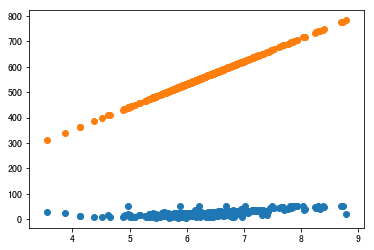

In [139]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [135]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [112]:
price_by_random_k_and_b

[-516.725,
 -503.943,
 -567.355,
 -551.8340000000001,
 -564.201,
 -504.68999999999994,
 -469.996,
 -483.27599999999995,
 -438.37300000000005,
 -469.33199999999994,
 -500.29099999999994,
 -469.747,
 -459.78700000000003,
 -464.767,
 -476.968,
 -455.222,
 -463.60499999999996,
 -468.17,
 -423.848,
 -446.341,
 -433.31,
 -466.09499999999997,
 -480.786,
 -453.479,
 -462.692,
 -435.71700000000004,
 -453.479,
 -472.90099999999995,
 -510.08500000000004,
 -524.942,
 -445.17900000000003,
 -474.976,
 -464.85,
 -444.183,
 -476.968,
 -463.43899999999996,
 -455.803,
 -456.54999999999995,
 -466.178,
 -518.385,
 -553.992,
 -532.91,
 -483.02699999999993,
 -486.51300000000003,
 -474.727,
 -442.60600000000005,
 -451.23799999999994,
 -471.49,
 -419.117,
 -435.966,
 -465.92900000000003,
 -478.545,
 -511.413,
 -468.834,
 -459.704,
 -572.6669999999999,
 -500.789,
 -536.728,
 -481.03499999999997,
 -462.941,
 -447.503,
 -466.178,
 -506.84800000000007,
 -532.246,
 -560.6320000000001,
 -493.07000000000005,
 -451.3

In [113]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

## loss
$$loss = \frac{1}{n} \sum({y_i - \hat{y_i}})$$

### First Method: Random generation : get best k and best b

In [156]:
def loss(y, y_hat): # to evalute the performance
#     (list(y) - list(y_hat))
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [157]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [169]:
X_rm = X[:, 5]

In [188]:
trying_times = 10000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 30 best_b: 39, and the loss is: 42286.3237278656
When time is : 1, get best_k: 5 best_b: -38, and the loss is: 899.2620952075098
When time is : 15, get best_k: -9 best_b: 87, and the loss is: 267.5467288675891
When time is : 160, get best_k: 17 best_b: -76, and the loss is: 143.32251972924894
When time is : 247, get best_k: 15 best_b: -78, and the loss is: 99.96782129446643
When time is : 802, get best_k: 12 best_b: -56, and the loss is: 57.45499045059286
When time is : 937, get best_k: 10 best_b: -41, and the loss is: 44.468997430830086
When time is : 1501, get best_k: 9 best_b: -34, and the loss is: 43.6065241245059


In [186]:
44 ** 0.5

6.6332495807108

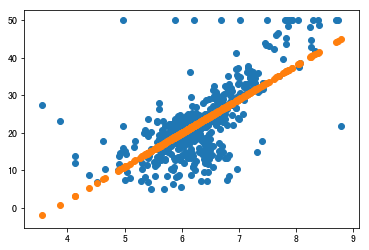

In [189]:
X_rm = X[:, 5]
k = 9
b = -34
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

###  2nd-Method: Direction Adjusting

In [217]:
trying_times = 10000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1), # first element: k's change direction, second element: b's change direction
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

# 当loss变差时，责转动方向
current_direction = random.choice(direction)

# 学习率
scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction

    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss: # performance became better
        
        min_loss = current_loss
        
        best_k, best_b = current_k, current_b

        next_direction = next_direction
        update_time += 1

        if update_time % 10 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))


    else: # performance became worse
        next_direction = random.choice(direction) # 这里存在瑕疵，可能会随机到刚才坏的方向
        


When time is : 9, get best_k: -4.994830481326989 best_b: 33.56421900561092, and the loss is: 556.0106734496057
When time is : 19, get best_k: -3.9948304813269924 best_b: 34.56421900561094, and the loss is: 299.0585903695816
When time is : 29, get best_k: -2.9948304813269915 best_b: 35.56421900561095, and the loss is: 149.2236940365928
When time is : 40, get best_k: -1.9948304813269906 best_b: 36.36421900561096, and the loss is: 105.94813147399395


#### 如果我们想要得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：
#### 找对改变的方向

#### 如何找到对的方向呢？

#### 2nd-method：监督让他变化 --> 监督学习

## 导数